In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Reading the CSV into Pandas Series
on_wrist_1hz_df = pd.read_csv('../sample-data/2021/02/04/device_012/on_wrist.csv', names=['on_wrist'])
ppg_64hz_df = pd.read_csv('../sample-data/2021/02/04/device_012/ppg_green.csv', names=['ppg'])

In [3]:
# Describe the on_wrist values
on_wrist_1hz_df.describe()

,on_wrist
count,1058.000000
mean,0.645558
std,0.478570
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


<AxesSubplot:>

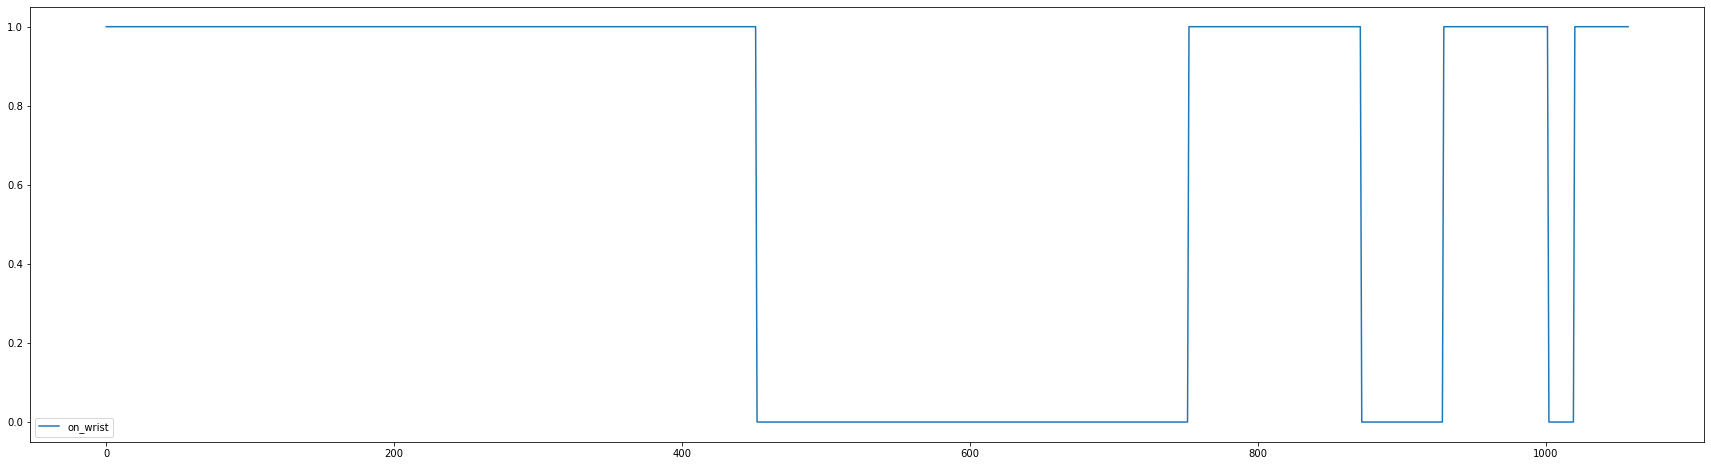

In [4]:
on_wrist_1hz_df.plot(figsize=(30,8))

In [5]:
# Describe the wrist temperature values
ppg_64hz_df.describe()

,ppg
count,67760.000000
mean,5132.522535
std,2332.188184
min,63.000000
25%,3011.000000
50%,5183.000000
75%,6568.000000
max,20316.000000


<AxesSubplot:>

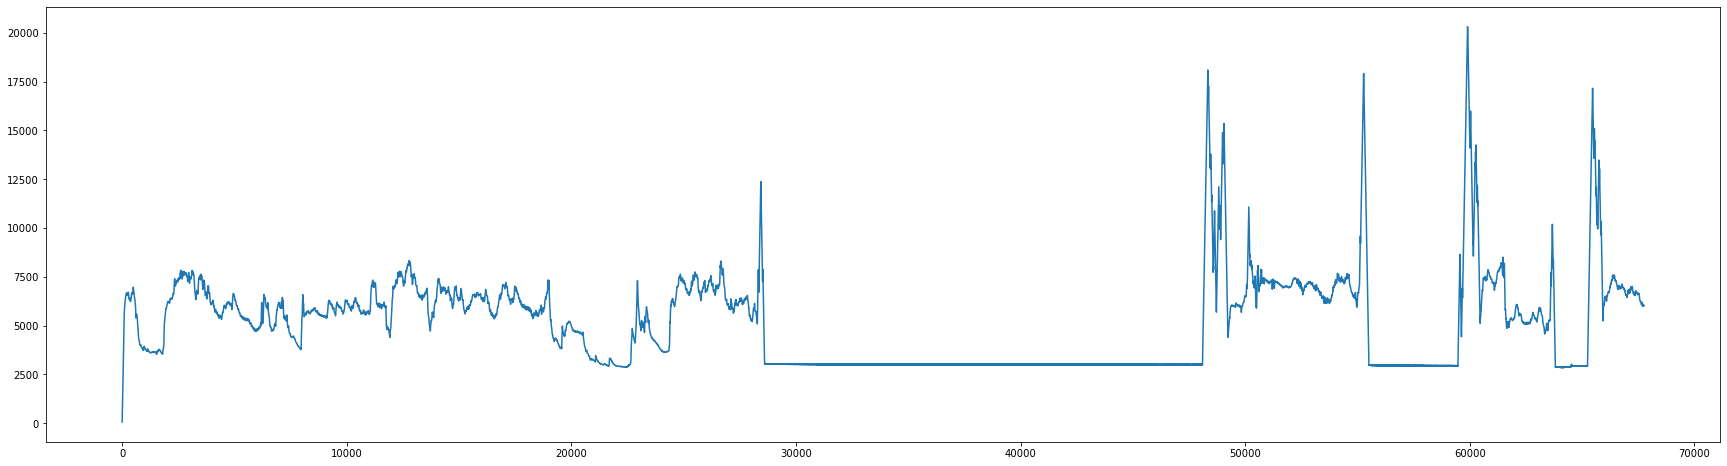

In [6]:
ppg_64hz_df['ppg'].plot(figsize=(30,8))

In [7]:
# Transform the on_wrist signal from 1Hz to 4Hz
ppg_4hz_df_array = pd.DataFrame(0, index=np.arange(int(len(ppg_64hz_df)/16)), columns=['ppg'])
for index in range(0,int(len(ppg_64hz_df)),16):
    ppg_4hz_df_array['ppg'][index/16] = ppg_64hz_df['ppg'][int(index)]

<AxesSubplot:>

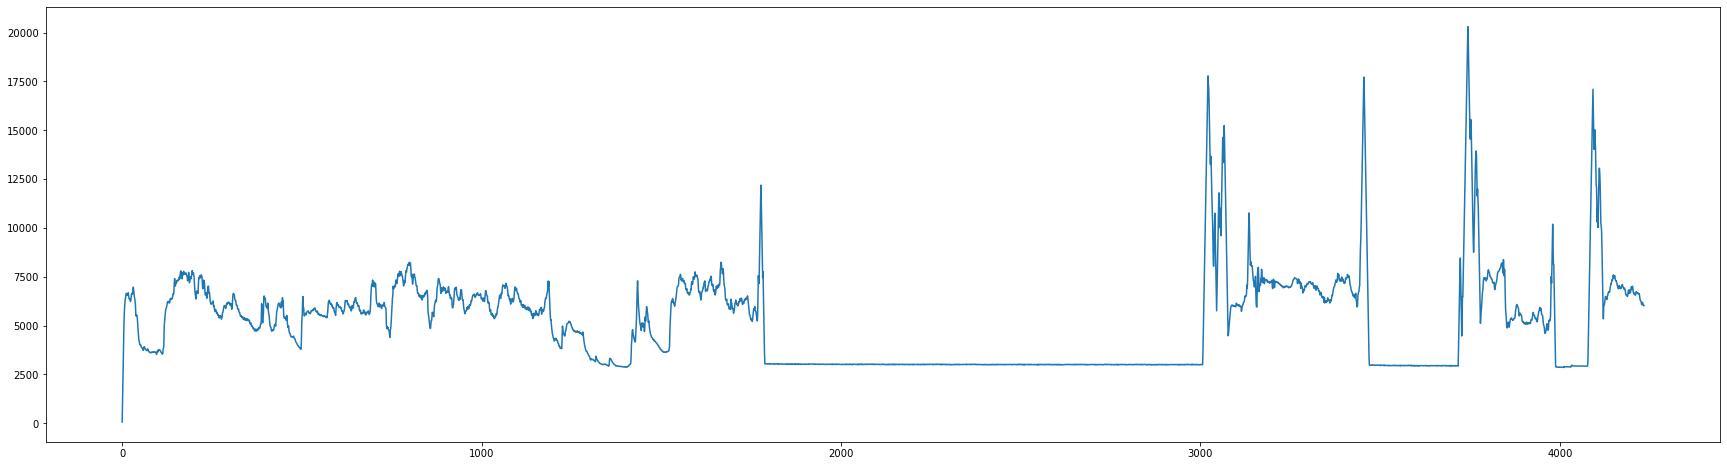

In [8]:
ppg_4hz_df_array['ppg'].plot(figsize=(30,8))

In [9]:
# Transform the on_wrist signal from 1Hz to 4Hz
on_wrist_4hz_array = pd.DataFrame(0, index=np.arange(len(on_wrist_1hz_df)*4), columns=['on_wrist'])
for index, value in on_wrist_4hz_array['on_wrist'].items():
    on_wrist_4hz_array['on_wrist'][index] = on_wrist_1hz_df['on_wrist'][int(index/4)]

<AxesSubplot:>

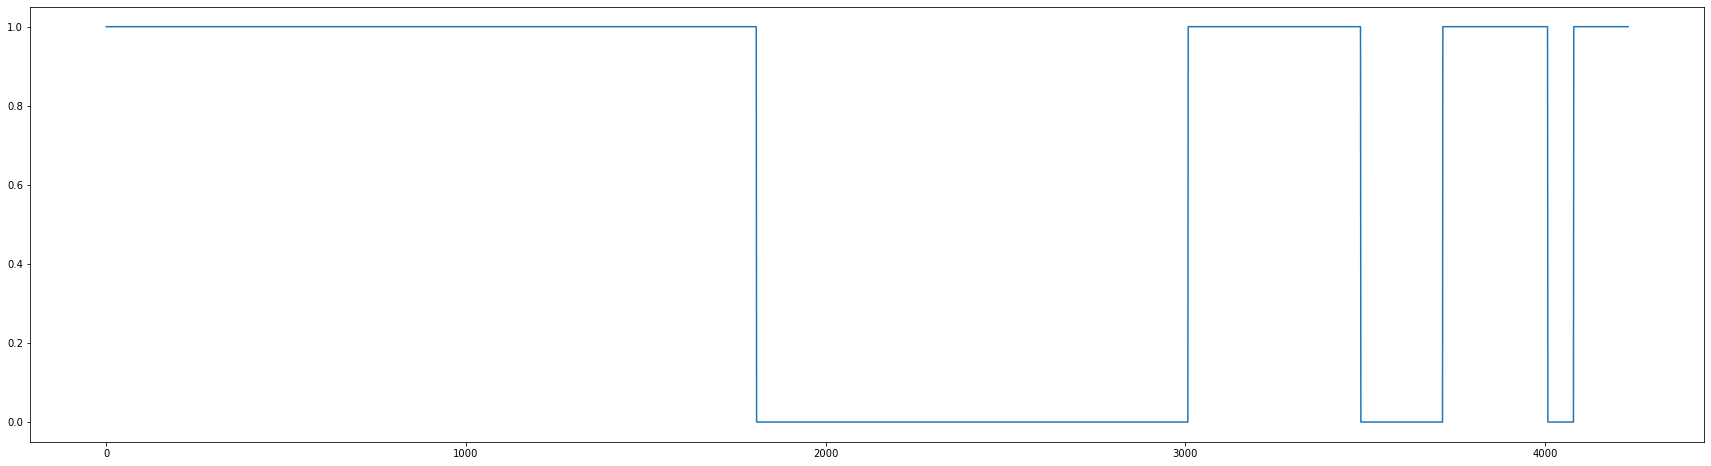

In [10]:
on_wrist_4hz_array['on_wrist'].plot(figsize=(30,8))

In [11]:
data = {"on_wrist": on_wrist_4hz_array['on_wrist'],
        "ppg": ppg_4hz_df_array['ppg']}
df = pd.concat(data,
               axis = 1)

In [12]:
df['active_ppg'] = df.apply(lambda row: row.on_wrist * row.ppg, axis=1)

<AxesSubplot:>

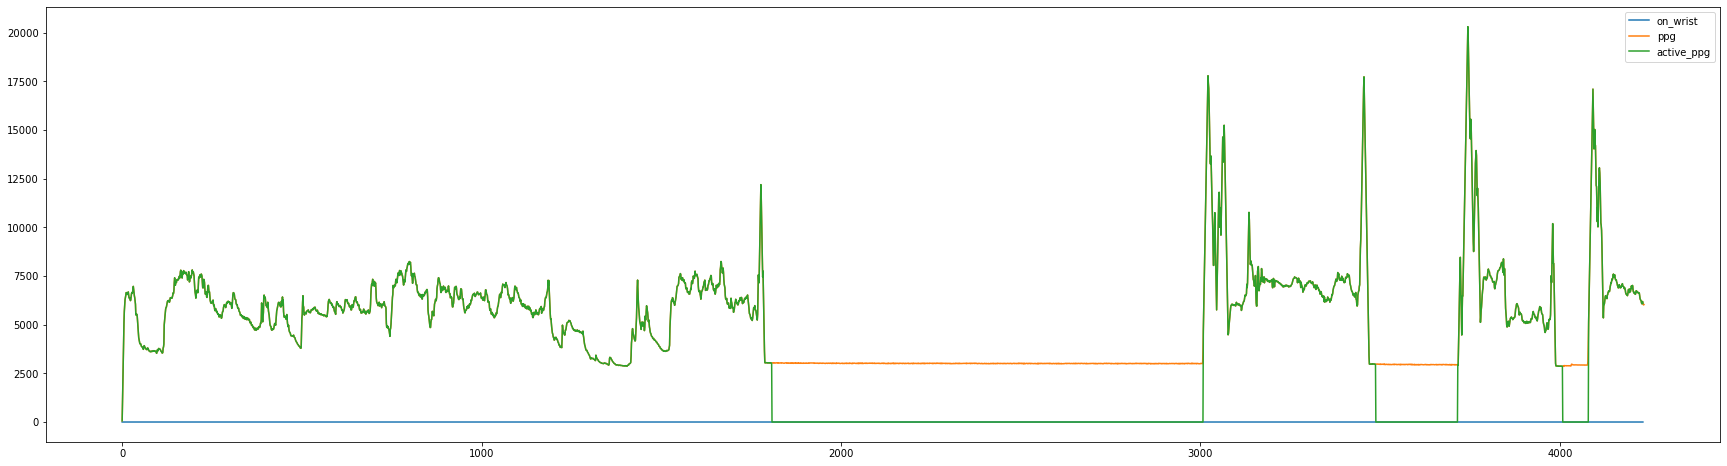

In [13]:
df.plot(figsize=(30,8))

In [15]:
df = df.drop(df[df.active_ppg == 0].index)

<AxesSubplot:>

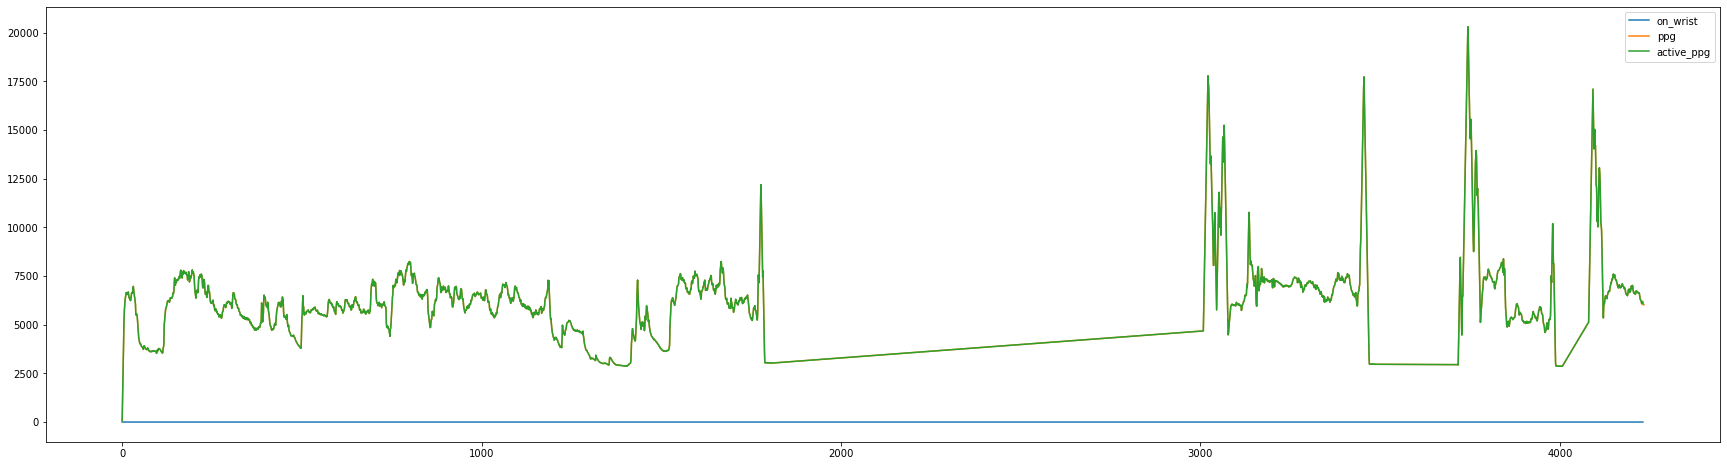

In [16]:
df.plot(figsize=(30,8))

<AxesSubplot:>

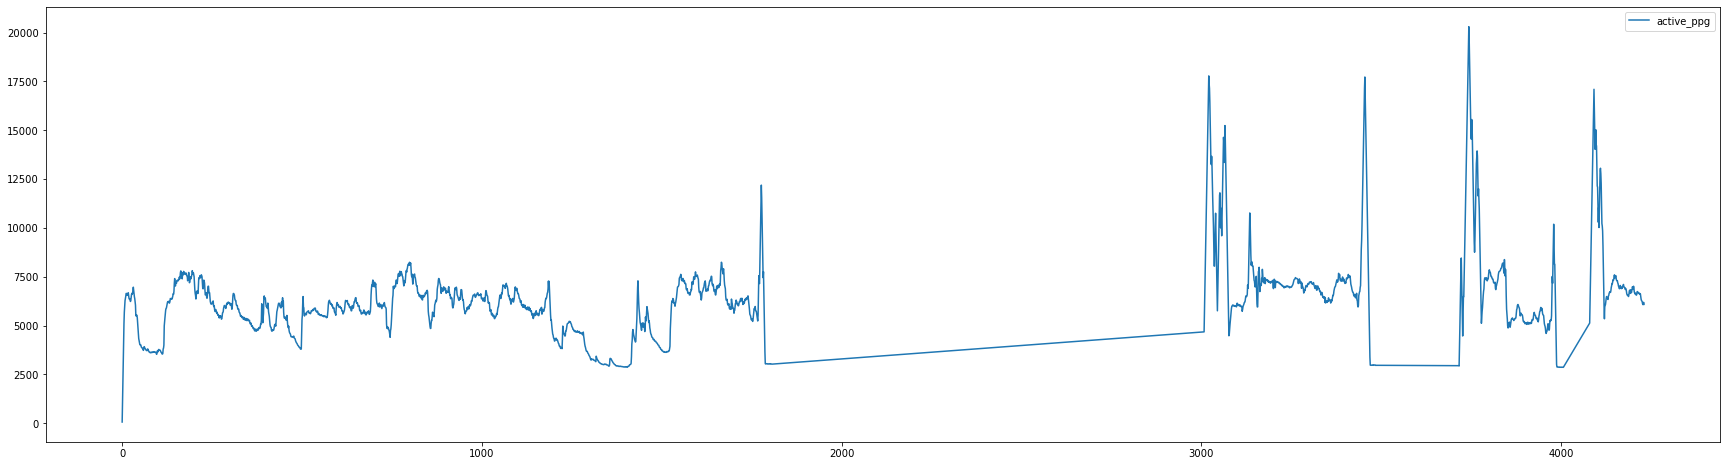

In [18]:
df[['active_ppg']].plot(figsize=(30,8))

In [19]:
df.describe()

,on_wrist,ppg,active_ppg
count,2732.0,2735.000000,2732.000000
mean,1.0,6302.283729,6302.588946
std,0.0,2136.754650,2137.908050
min,1.0,63.000000,63.000000
25%,1.0,5326.000000,5325.500000
50%,1.0,6192.000000,6192.000000
75%,1.0,7037.000000,7038.000000
max,1.0,20303.000000,20303.000000
